Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Manuela Bastidas Olivares y Nicolás Guarín-Zapata 2024.

# Método de colocación: Implementación numérica

In [1]:
## Problema a resolver

Consideremos la siguiente ecuación diferencial

$$\frac{d^2u}{dx^2} = -4 \pi^2 \sin(2 \pi x) \, , $$

con condiciones de frontera $u(0)=u(1)=0$.

La solución a este problema de valores de la frontera es

$$u_e(x) = \sin (2 \pi x)\, .$$

In [2]:
# Esto permite tener gráficos interactivos en
# el caso de correrse en Google Colab
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [3]:
%matplotlib widget

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
if 'google.colab' in str(get_ipython()):
    style = "https://raw.githubusercontent.com/nicoguaro/pinns_mapi-3/main/notebooks/clean.mplstyle"
else:
    style = "./clean.mplstyle"
plt.style.use(style)

In [6]:
def coloc_mat(pts):
    """Genera la matriz de colocación

    Parámetros
    ----------
    pts : ndarray
        Puntos de colocación.

    Retorna
    -------
    mat : ndarray
        Matriz de colocación.
    """
    pts = np.asarray(pts)
    N = pts.shape[0]
    mat = np.zeros((N, N))
    for row, pt in enumerate(pts):
        for col in range(N):
            k = col + 1
            mat[row, col] = k*pt**(k - 2)*((k + 1)*pt - k + 1)

    return mat


def eval_sol(x_eval, coefs):
    sol = np.zeros_like(x_eval)
    for k, c in enumerate(coefs):
        sol += c * x_eval * (x_eval - 1) * x_eval**k
    return sol

In [7]:
N = 8
pts = np.linspace(0, 1, N + 2)
mat = coloc_mat(pts[1:-1])
f = lambda x: -4*np.pi**2*np.sin(2*np.pi*x)
rhs = [f(pt) for pt in pts[1:-1]]

In [8]:
coefs = np.linalg.solve(mat, rhs)

In [9]:
x_eval = np.linspace(0, 1, 101)
y_eval = eval_sol(x_eval, coefs)

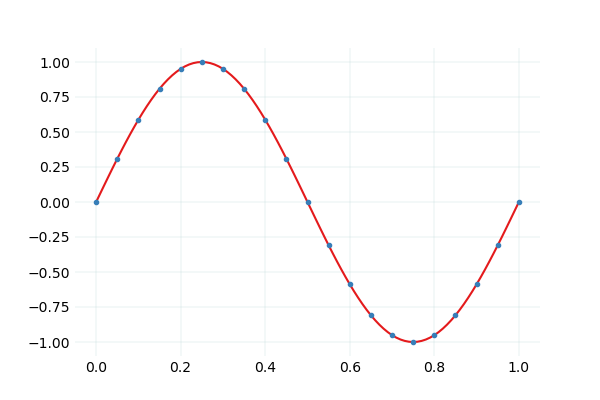

In [10]:
plt.figure()
plt.plot(x_eval, np.sin(2*np.pi*x_eval))
plt.plot(x_eval, y_eval, ".", markevery=5)